In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
stress10_df = pd.read_csv("cleaned_data/stress10-cleaned.csv")
stress25_df = pd.read_csv("cleaned_data/stress25-cleaned.csv")
stress50_df = pd.read_csv("cleaned_data/stress50-cleaned.csv")

nt_stress10_df = pd.read_csv("cleaned_data/nt_stress10-cleaned.csv")
nt_stress25_df = pd.read_csv("cleaned_data/nt_stress25-cleaned.csv")
nt_stress50_df = pd.read_csv("cleaned_data/nt_stress50-cleaned.csv")

expert_df = pd.read_csv("cleaned_data/stress_expert-cleaned.csv")

ex_stress10_df = expert_df[['deltas10', 'accuracy10', 'confidence10', 'answers10', 'time10']].copy()
ex_stress25_df = expert_df[['deltas25', 'accuracy25', 'confidence25', 'answers25', 'time25']].copy()
ex_stress50_df = expert_df[['deltas50', 'accuracy50', 'confidence50', 'answers50', 'time50']].copy()

ex_stress10_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time']
ex_stress25_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time']
ex_stress50_df.columns = ['deltas', 'accuracy', 'confidence', 'answers', 'time']

def parse_column_to_list(df, column_name):
    return df[column_name].apply(eval)


for df in [stress10_df, stress25_df, stress50_df, nt_stress10_df, nt_stress25_df, nt_stress50_df, ex_stress10_df, ex_stress25_df, ex_stress50_df]:
    df['deltas'] = parse_column_to_list(df, 'deltas')
    df['accuracy'] = parse_column_to_list(df, 'accuracy')
    df['confidence'] = parse_column_to_list(df, 'confidence')
    df['answers'] = parse_column_to_list(df, 'answers')

    df['average_accuracy'] = df['accuracy'].apply(lambda x: sum(x) / len(x))

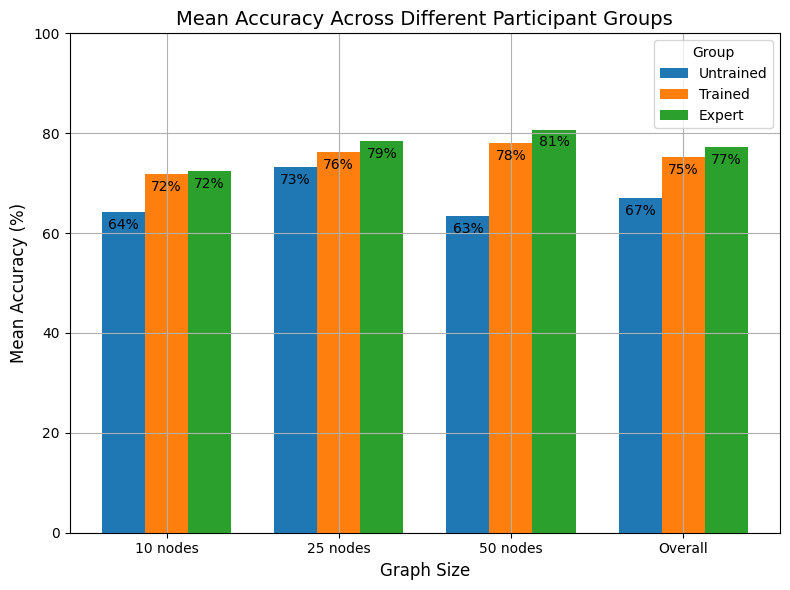

In [23]:
# Calculate mean values
mean_values = {
    "10 nodes": {
        "Untrained": nt_stress10_df['average_accuracy'].mean() * 100,
        "Trained": stress10_df['average_accuracy'].mean() * 100,
        "Expert": ex_stress10_df['average_accuracy'].mean() * 100,
    },
    "25 nodes": {
        "Untrained": nt_stress25_df['average_accuracy'].mean() * 100,
        "Trained": stress25_df['average_accuracy'].mean() * 100,
        "Expert": ex_stress25_df['average_accuracy'].mean() * 100,
    },
    "50 nodes": {
        "Untrained": nt_stress50_df['average_accuracy'].mean() * 100,
        "Trained": stress50_df['average_accuracy'].mean() * 100,
        "Expert": ex_stress50_df['average_accuracy'].mean() * 100,
    },
    "Overall": {
        "Untrained": pd.concat([nt_stress10_df, nt_stress25_df, nt_stress50_df])['average_accuracy'].mean() * 100,
        "Trained": pd.concat([stress10_df, stress25_df, stress50_df])['average_accuracy'].mean() * 100,
        "Expert": pd.concat([ex_stress10_df, ex_stress25_df, ex_stress50_df])['average_accuracy'].mean() * 100,
    },
}

# Prepare data for plotting
x_labels = list(mean_values.keys())
groups = list(mean_values["10 nodes"].keys())
bar_width = 0.05
# x = np.arange(len(x_labels))
x = np.arange(len(x_labels)) * (len(groups) * bar_width + 0.05 )

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

for i, group in enumerate(groups):
    group_means = [mean_values[label][group] for label in x_labels]
    # ax.bar(x + i * bar_width, group_means, width=bar_width, label=group)

    bars = ax.bar(x + i * bar_width, group_means, width=bar_width, label=group)

    # Add percentage value annotations to each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height - 4,  # Position above the bar
            f"{height:.0f}%",  # Display percentage value
            ha='center', va='bottom', fontsize=10
        )

# Add labels and legend
ax.set_ylim(0, 100)
ax.set_xlabel("Graph Size", fontsize=12)
ax.set_ylabel("Mean Accuracy (%)", fontsize=12)
ax.set_title("Mean Accuracy Across Different Participant Groups", fontsize=14)
# ax.set_xticks(x + bar_width)
ax.set_xticks(x + (len(groups) * bar_width) / 2 - bar_width / 2) 
# ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(title="Group")

# Display chart
plt.tight_layout()
plt.grid(True)
plt.savefig('figures/mean_accuracy_grouped.pdf', format='pdf')
plt.show()

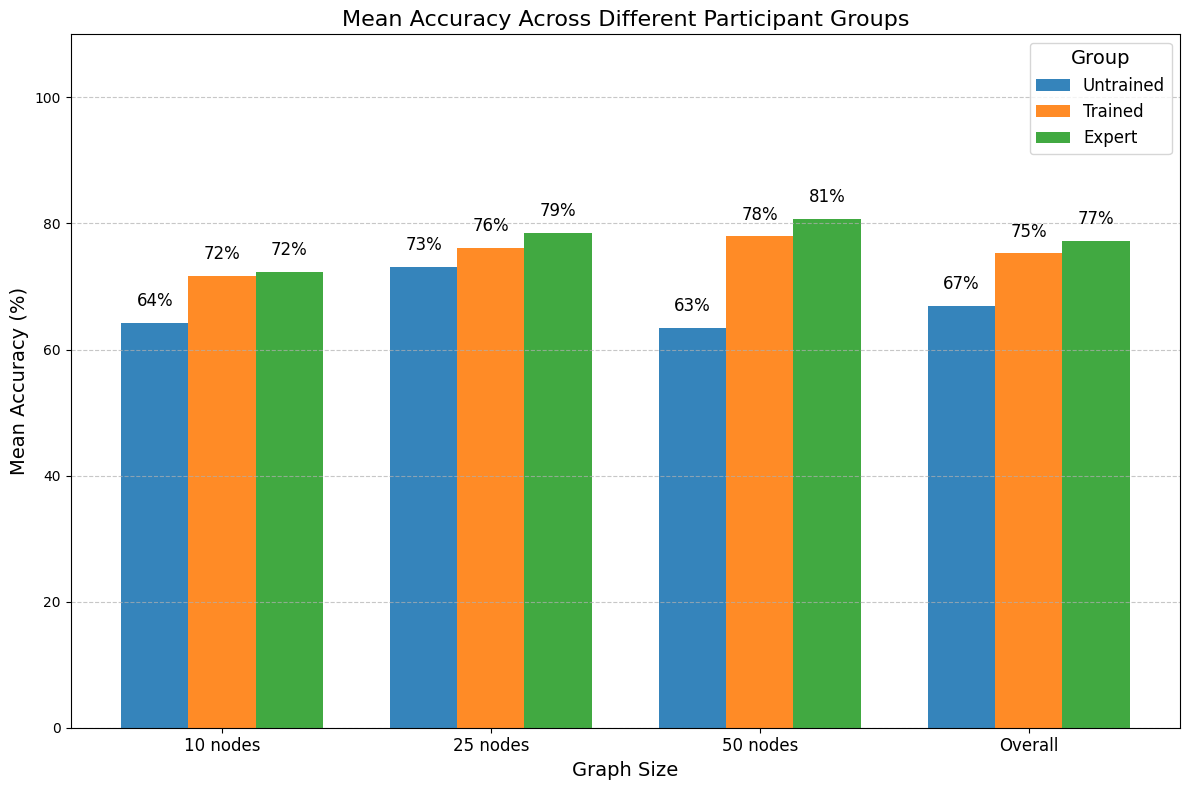

In [24]:
# Prepare data for plotting
x_labels = list(mean_values.keys())
groups = list(mean_values["10 nodes"].keys())
bar_width = 0.15  # Wider bars for better visibility
x = np.arange(len(x_labels)) * (len(groups) * bar_width + 0.15)  # Adjust spacing

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Wider figure

for i, group in enumerate(groups):
    group_means = [mean_values[label][group] for label in x_labels]
    bars = ax.bar(x + i * bar_width, group_means, width=bar_width, label=group, alpha=0.9)

    # Add percentage value annotations to each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 2,  # Position above the bar
            f"{height:.0f}%",  # Display percentage value
            ha='center', va='bottom', fontsize=12  # Larger font
        )

# Add labels, legend, and grid
ax.set_ylim(0, 110)  # Add padding above 100%
ax.set_xlabel("Graph Size", fontsize=14)
ax.set_ylabel("Mean Accuracy (%)", fontsize=14)
ax.set_title("Mean Accuracy Across Different Participant Groups", fontsize=16)
ax.set_xticks(x + (len(groups) * bar_width) / 2 - bar_width / 2)
ax.set_xticklabels(x_labels, fontsize=12)
ax.legend(title="Group", fontsize=12, title_fontsize=14)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display
plt.tight_layout()
plt.savefig('figures/mean_accuracy_grouped.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()


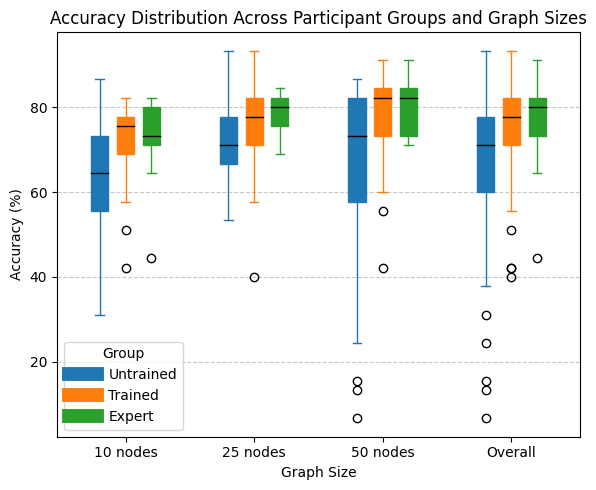

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for grouped box plots
data = {
    "10 nodes": {
        "Untrained": nt_stress10_df['average_accuracy'] * 100,
        "Trained": stress10_df['average_accuracy'] * 100,
        "Expert": ex_stress10_df['average_accuracy'] * 100,
    },
    "25 nodes": {
        "Untrained": nt_stress25_df['average_accuracy'] * 100,
        "Trained": stress25_df['average_accuracy'] * 100,
        "Expert": ex_stress25_df['average_accuracy'] * 100,
    },
    "50 nodes": {
        "Untrained": nt_stress50_df['average_accuracy'] * 100,
        "Trained": stress50_df['average_accuracy'] * 100,
        "Expert": ex_stress50_df['average_accuracy'] * 100,
    },
    "Overall": {
        "Untrained": pd.concat([nt_stress10_df, nt_stress25_df, nt_stress50_df])['average_accuracy'] * 100,
        "Trained": pd.concat([stress10_df, stress25_df, stress50_df])['average_accuracy'] * 100,
        "Expert": pd.concat([ex_stress10_df, ex_stress25_df, ex_stress50_df])['average_accuracy'] * 100,
    },
}

# Define group colors
group_colors = {
    "Untrained": 'tab:blue',
    "Trained": 'tab:orange',
    "Expert": 'tab:green',
}

# Plot grouped box plots
x_labels = list(data.keys())
groups = list(data["10 nodes"].keys())

fig, ax = plt.subplots(figsize=(6, 5))

# Group box plots by graph size
positions = []
labels = []
group_spacing = 1.5  # Space between graph size groups
box_spacing = 0.3  # Space between participant groups in each graph size

for i, label in enumerate(x_labels):
    start_pos = i * group_spacing
    for j, group in enumerate(groups):
        positions.append(start_pos + j * box_spacing)
        labels.append(group)

        # Extract data for the current group and graph size
        current_data = data[label][group]
        bp = ax.boxplot(
            current_data,
            positions=[start_pos + j * box_spacing],
            patch_artist=True,  # Filled boxes
            widths=0.2,
            boxprops=dict(facecolor=group_colors[group], color=group_colors[group]),
            medianprops=dict(color='black'),
            whiskerprops=dict(color=group_colors[group]),
            capprops=dict(color=group_colors[group]),
        )

# Adjust x-axis
ax.set_xticks(np.arange(len(x_labels)) * group_spacing + (len(groups) - 1) * box_spacing / 2)
ax.set_xticklabels(x_labels)

# Add labels, title, and grid
ax.set_xlabel("Graph Size", fontsize=10)
ax.set_ylabel("Accuracy (%)", fontsize=10)
ax.set_title("Accuracy Distribution Across Participant Groups and Graph Sizes", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend
for group, color in group_colors.items():
    ax.plot([], [], color=color, label=group, linewidth=10)  # Dummy lines for legend
ax.legend(title="Group", loc='lower left')

# Save and show the plot
plt.tight_layout()
plt.savefig('figures/boxplot_accuracy_grouped.pdf', format='pdf')
plt.show()
